In [1]:
# autoreload libraries automatically when making changes
%load_ext autoreload
%autoreload 2

In [2]:
# import PiSwap models
from lib.market import PiSwapMarket
from lib.account import Account
from lib.types import TokenType, SwapKind

In [3]:
# create a new market instance
market = PiSwapMarket()
# set up investors with initial ETH balances
A = Account("A", 10000000)
B = Account("B", 10000000)
C = Account("C", 10000000)

In [4]:
# pay 2 ETH to mint bull and bear tokens
minted_bull_bear = market.mint(A, SwapKind.GIVEN_IN, 10)

TRANSFER: A 10 ETH => Market
MINT: 999000.999000999 BULL => A
MINT: 999000.999000999 BEAR => A

Token price
Mint: 0.000005010005 0.000005010005 | combined 0.00001002001
_________________________________________________

Cannot get NFT price, swap not initialized
_________________________________________________



In [5]:
# burn 1000 tokens and receive ETH
amount_eth = market.burn(A, SwapKind.GIVEN_IN, 1000)

BURN: A => 1000 BULL
BURN: A => 1000 BEAR
TRANSFER: Market 0.0100199999700 ETH => A

Token price
Mint: 0.00000500999496998505005 0.00000500999496998505005 | combined 0.0000100199899399701001
_________________________________________________

Cannot get NFT price, swap not initialized
_________________________________________________



In [6]:
# burn as many tokens it takes to receive 1 ETH
amount_eth = market.burn(A, SwapKind.GIVEN_OUT, 1)

BURN: A => 99810.470486755 BULL
BURN: A => 99810.470486755 BEAR
TRANSFER: Market 1 ETH => A

Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
_________________________________________________

Cannot get NFT price, swap not initialized
_________________________________________________



In [7]:
# add initial liquidity
amount_eth = 1
amount_bull = 100000
amount_bear = 50000
amount_liquidity_tokens = market.initializePool(A, amount_eth, amount_bull, amount_bear)

TRANSFER: A 100000 BULL => Swap
TRANSFER: A 50000 BEAR => Swap
TRANSFER: A 1 ETH => Swap
MINT: 1 LIQUIDITY => A

Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
Swap: 0.00000333333333333333333 0.0000133333333333333333 | combined 0.0000166666666666666666
_________________________________________________

Pool sizes

ETH: 0.333333333333333333 ETH / BULL: 100000 tokens
ETH: 0.666666666666666667 ETH / BEAR: 50000 tokens
_________________________________________________

Amount liquidity held by pool: 0 % / 0E-17 ETH
Locked Liquidity for swap: 0 ETH
_________________________________________________

NFT Value: 0.25 ETH
_________________________________________________



In [8]:
# add more liquidity
# disable all logging, by passing parameter
amount_liquidity_tokens = market.addLiquidity(A, 1, log=False)
print(amount_liquidity_tokens)

1


In [9]:
# disable logging, but enable transaction logging
amount_liquidity_tokens = market.addLiquidity(A, 1, log=False, txLog=True)

TRANSFER: A 100000.000000000000 BULL => Swap
TRANSFER: A 50000.000000000000 BEAR => Swap
TRANSFER: A 1 ETH => Swap
MINT: 1 LIQUIDITY => A


In [10]:
# enable logging, but disable transaction logging
amount_liquidity_tokens = market.addLiquidity(A, 1, txLog=False)


Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
Swap: 0.00000333333333333333332 0.0000133333333333333334 | combined 0.0000166666666666666667
_________________________________________________

Pool sizes

ETH: 1.33333333333333333 ETH / BULL: 400000.000000000000 tokens
ETH: 2.66666666666666667 ETH / BEAR: 200000.000000000000 tokens
_________________________________________________

Amount liquidity held by pool: 0 % / 0E-17 ETH
Locked Liquidity for swap: 0 ETH
_________________________________________________

NFT Value: 0.25 ETH
_________________________________________________



In [11]:
# remove liquidity
amount_eth, amount_bull, amount_bear = market.removeLiquidity(A, 0.5)

BURN: A => 0.5 LIQUIDITY
TRANSFER: Swap 0.500 ETH => A
TRANSFER: Swap 50000.0000000000000 BULL => A
TRANSFER: Swap 25000.0000000000000 BEAR => A

Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
Swap: 0.00000333333333333333334 0.0000133333333333333333 | combined 0.0000166666666666666666
_________________________________________________

Pool sizes

ETH: 1.16666666666666667 ETH / BULL: 350000.000000000000 tokens
ETH: 2.33333333333333333 ETH / BEAR: 175000.000000000000 tokens
_________________________________________________

Amount liquidity held by pool: 0E+1 % / 0E-16 ETH
Locked Liquidity for swap: 0 ETH
_________________________________________________

NFT Value: 0.25 ETH
_________________________________________________



In [12]:
# buy tokens
# specify amount of ETH given in
amount_out = market.swap(B, TokenType.ETH, TokenType.BULL, SwapKind.GIVEN_IN, 1)
print(amount_out)

TRANSFER: B 1 ETH => Swap
TRANSFER: Swap 110526.315789473684 BULL => B
MINT: 0.189189189189189210 LIQUIDITY => Swap

Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
Swap: 0.00000793406593406593406 0.0000148571428571428571 | combined 0.0000227912087912087912
_________________________________________________

Pool sizes

ETH: 1.90000000000000000 ETH / BULL: 239473.684210526316 tokens
ETH: 2.60000000000000000 ETH / BEAR: 175000.000000000000 tokens
_________________________________________________

Amount liquidity held by pool: 5.12820512820512874 % / 0.461538461538461586 ETH
Locked Liquidity for swap: 0.1093883538856 ETH
_________________________________________________

NFT Value: 0.534023668639053254 ETH
_________________________________________________

110526.315789473684


In [13]:
# sell tokens
# specify amount of ETH received
amount_out = market.swap(A, TokenType.BEAR, TokenType.ETH, SwapKind.GIVEN_OUT, 0.2)
print(amount_out)

TRANSFER: A 15909.0909090909101 BEAR => Swap
TRANSFER: Swap 0.200000000000000011102230246251565404236316680908203125 ETH => A
MINT: 0.00716347415376540126 LIQUIDITY => Swap

Token price
Mint: 0.00000500899402098705005 0.00000500899402098705005 | combined 0.0000100179880419741001
Swap: 0.00000796493778594945911 0.0000125327033537150267 | combined 0.0000204976411396644858
_________________________________________________

Pool sizes

ETH: 1.90739299610894942 ETH / BULL: 239473.684210526316 tokens
ETH: 2.39260700389105057 ETH / BEAR: 190909.090909090910 tokens
_________________________________________________

Amount liquidity held by pool: 5.31206519578612617 % / 0.456837606837606849 ETH
Locked Liquidity for swap: 0.1135304570402 ETH
_________________________________________________

NFT Value: 0.635532299867964209 ETH
_________________________________________________

15909.0909090909101


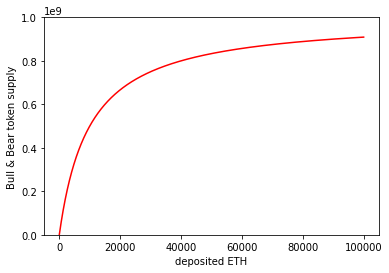

In [14]:
# number of supply of tokens based on deposited eth 
import matplotlib.pyplot as plt
import numpy as np
from lib.formula import *
x = np.arange(Decimal(0.0), Decimal(100000), Decimal(1))
plt.plot(x, token_formula(x), 'r-')
plt.ylim((0, maxSupply))
plt.xlabel("deposited ETH")
plt.ylabel("Bull & Bear token supply")
# plt.show()
plt.savefig('filename.pdf')